In [1]:
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd

In [2]:
inspection_df = pd.read_csv('Insp_Comb_clean.csv')

In [3]:
for index, row in inspection_df.iterrows():
    if inspection_df.loc[index, 'price'] == 'cheap':
        inspection_df.loc[index, 'price'] = '1'
        
    elif inspection_df.loc[index, 'price'] == 'Expensive':
        inspection_df.loc[index, 'price'] = '3'
        
    elif inspection_df.loc[index, 'price'] == 'Mid':
        inspection_df.loc[index, 'price'] = '2'

In [4]:
inspection_df

,Name,Score,Address,City,Zip,Rating,Review Count,Yelp Name,price
0,108 Bar N Grill,98.750000,10845 NE Halsey St,Portland,97220,4.0,34,108 Bar N Grill,1
1,S'Mores Bar,82.000000,1126 SW Alder St,Portland,97205,4.5,96,1927 S'mores Company,1
2,Taste of Excellence,100.000000,1132 SW 19th Ave 101,Portland,97205,4.5,96,1927 S'mores Company,1
3,21st Century Pizza,98.000000,1221 SW Jefferson St,Portland,97201,4.0,158,21st Century Pizza,1
4,"22 Below,",94.500000,1728 SW Jefferson St,Portland,97201,4.0,113,22 Below,1
...,...,...,...,...,...,...,...,...,...
2090,Morton's Steak House,94.000000,213 SW Clay St,Portland,97201,4.0,278,Morton's The Steakhouse,3
2091,Nodoguro,98.500000,2832 SE Belmont St,Portland,97214,5.0,82,Nodoguro,3
2092,Nomad Restaurant,89.500000,575 NE 24th Ave,Portland,97232,4.5,164,Nomad PDX,3
2093,Roe,86.333333,515 SW Broadway Suite 100,Portland,97205,4.5,218,Roe,3


In [5]:
x_values = inspection_df['price']
y_values = inspection_df['Score']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
pr = st.pearsonr(x_values, y_values)[0]
rv2 = rvalue ** 2
print(f'The Corelation Coefficient between price and rating is {pr}')
print(f'The R-Squared value is {rv2}')
plt.scatter(x_values, y_values)
plt.title('Price Point($) vs Inspection Rating')
plt.xlabel('Price Point ($ rating on yelp)')
plt.ylabel('Inspection Rating')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Text(0.5, 1.0, 'Inspection Score Distribution')

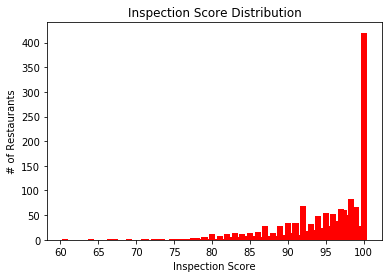

In [7]:
#plt.bar(y_values, len(inspection_df))
inspection_bar = inspection_df.groupby('Score').count()
inspection_bar = inspection_bar.reset_index()
x = inspection_bar['Score']
y = inspection_bar['Name']
plt.bar(x,y, color='red')
plt.xlabel('Inspection Score')
plt.ylabel('# of Restaurants')
plt.title('Inspection Score Distribution')

Text(0.5, 1.0, 'Price Rating Distribution')

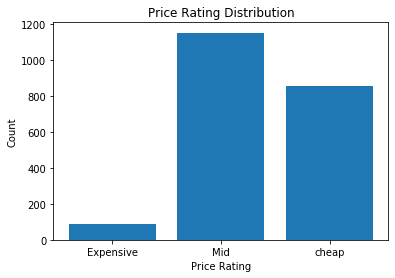

In [10]:
inspection_bar = inspection_df.groupby('price').count()
inspection_bar = inspection_bar.reset_index()
x = inspection_bar['price']
y = inspection_bar['Name']
plt.bar(x,y)
plt.xlabel('Price Rating')
plt.ylabel('Count')
plt.title('Price Rating Distribution')
